In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Simulating data
np.random.seed(42)
# --------------------------------CTR -----"Click-Through Rate," 
# Version A data
n_a = 1000
ctr_a = np.random.normal(0.12, 0.02, n_a)  # Mean CTR of 0.12 with SD 0.02
group_a = ['A'] * n_a

# Version B data (higher CTR)
n_b = 1200
ctr_b = np.random.normal(0.15, 0.02, n_b)  # Mean CTR of 0.15 with SD 0.02
group_b = ['B'] * n_b

In [8]:
# Creating DataFrame
data = pd.DataFrame({'Group': group_a + group_b, 'CTR': np.concatenate((ctr_a, ctr_b))})
data.tail()

,Group,CTR
2195,B,0.136760
2196,B,0.158518
2197,B,0.150383
2198,B,0.137170
2199,B,0.159757


In [9]:
# Performing A/B test
a_data = data[data['Group'] == 'A']['CTR']
b_data = data[data['Group'] == 'B']['CTR']

t_stat, p_value = ttest_ind(a_data, b_data)

In [11]:
t_stat

-36.152593498439366

In [10]:
p_value

5.2442011104202276e-225

c:\Users\tonya\anaconda3\envs\quantra_py\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\tonya\anaconda3\envs\quantra_py\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\tonya\anaconda3\envs\quantra_py\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\tonya\anaconda3\envs\quantra_py\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 67.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


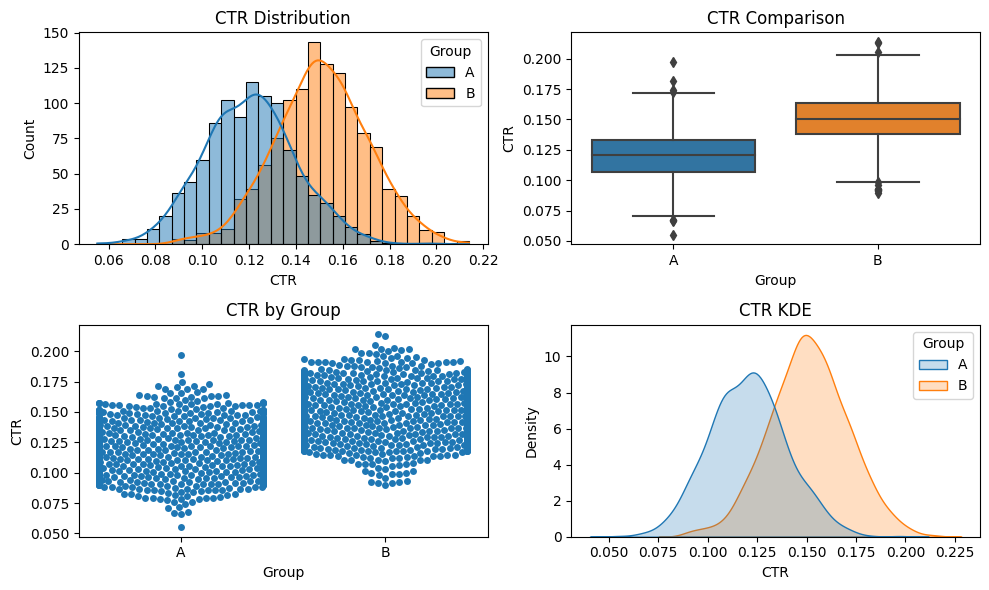

T-Statistic: -36.1526
P-Value: 0.0000
Statistically significant difference (p < 0.05)


In [12]:
# Visualizations
plt.figure(figsize=(10, 6))

# Histograms
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='CTR', hue='Group', kde= True)
plt.title('CTR Distribution')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='Group', y='CTR')
plt.title('CTR Comparison')

# Swarmplot
plt.subplot(2, 2, 3)
sns.swarmplot(data=data, x='Group', y='CTR')
plt.title('CTR by Group')

# Probability Density Function (PDF)
plt.subplot(2, 2, 4)
sns.kdeplot(data=data, x='CTR', hue='Group', fill= True)
plt.title('CTR KDE')

plt.tight_layout()
plt.show()

# Display results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Statistically significant difference (p < 0.05)")
else:
    print("No statistically significant difference (p >= 0.05)")
